## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns

## Importing Dataset

In [2]:
dataset = pd.read_csv('banking-batch.csv')
dataset.shape

(4119, 20)

In [3]:
def print_heatmap(dataset):
    sns.heatmap(dataset.corr(), annot=True)

In [4]:
def preprocess(dataset):
    unknown_column_list = ['job', 'marital', 'education', 'default', 'housing', 'loan']
    
    print('#####  Before Dropping #####')
    print("{:<10}{:<15}{:<15}".format('Column','Unknown values', 'Percentage'))

    for column in unknown_column_list:
        print("{:<10}{:<18}{:.3f}".format(column,str(len(dataset.loc[dataset[column]=='unknown'].index)), len(dataset.loc[dataset[column]=='unknown'].index)/len(dataset)))   
    print("\nTotal values: " + str(len(dataset)))
    
    
    for column in unknown_column_list:
        dataset.drop(dataset.loc[dataset[column].astype(str)=='unknown'].index, inplace=True)
        
    
    print('#####  After Dropping #####')
    print("{:<10}{:<15}{:<15}".format('Column','Unknown values', 'Percentage'))
    for column in unknown_column_list:
        print("{:<10}{:<18}{:.3f}".format(column,str(len(dataset.loc[dataset[column]=='unknown'].index)), len(dataset.loc[dataset[column]=='unknown'].index)/len(dataset)))
    print("\nTotal values: " + str(len(dataset)))
        
        
    month_dict = { 'aug':8, 'nov':11, 'jun':6, 'apr':4, 'jul':7, 'may':5, 'oct':10, 'mar':3, 'sep':9, 'dec':12, 'jan':1, 'feb':2}
    day_of_week_dict = {'thu':4, 'fri':5, 'tue':2, 'mon':1, 'wed':3, 'sat':6, 'sun':7}

    dataset['month'] = dataset['month'].map(month_dict)
    dataset['day_of_week'] = dataset['day_of_week'].map(day_of_week_dict)
    
    print('#####  Before Dropping #####')
    print_heatmap(dataset)   
    
    del dataset['euribor3m']
    del dataset['nr_employed']
    del dataset['contact']

In [5]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()

In [6]:
def label_encode(dataset,action='encode'):
    
    def encode():
        print('#####  After Dropping #####')
        print_heatmap(dataset)
        
        dataset['job'] = le1.fit_transform(dataset['job'])
        print(le1.classes_)
        dataset['marital'] = le2.fit_transform(dataset['marital'])
        print(le2.classes_)
        dataset['education'] = le3.fit_transform(dataset['education'])
        print(le3.classes_)
        dataset['default'] = le4.fit_transform(dataset['default'])
        print(le4.classes_)
        dataset['housing'] = le5.fit_transform(dataset['housing'])
        print(le5.classes_)
        dataset['loan'] = le6.fit_transform(dataset['loan'])
        print(le6.classes_)
        dataset['poutcome'] = le7.fit_transform(dataset['poutcome'])
        print(le7.classes_)
    
    def inverse():
        dataset['job'] = le1.inverse_transform(dataset['job'])
        dataset['marital'] = le2.inverse_transform(dataset['marital'])
        dataset['education'] = le3.inverse_transform(dataset['education'])
        dataset['default'] = le4.inverse_transform(dataset['default'])
        dataset['housing'] = le5.inverse_transform(dataset['housing'])
        dataset['loan'] = le6.inverse_transform(dataset['loan'])
        dataset['poutcome'] = le7.inverse_transform(dataset['poutcome'])

        
    if (action=='encode'):
        encode()
    elif (action=='decode'):
        inverse()

#####  Before Dropping #####
Column    Unknown values Percentage     
job       39                0.009
marital   11                0.003
education 167               0.041
default   803               0.195
housing   105               0.025
loan      105               0.025

Total values: 4119
#####  After Dropping #####
Column    Unknown values Percentage     
job       0                 0.000
marital   0                 0.000
education 0                 0.000
default   0                 0.000
housing   0                 0.000
loan      0                 0.000

Total values: 3090
#####  Before Dropping #####


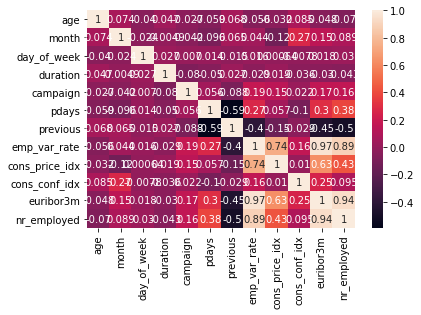

In [7]:
preprocess(dataset)

#####  After Dropping #####
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
['divorced' 'married' 'single']
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['failure' 'nonexistent' 'success']


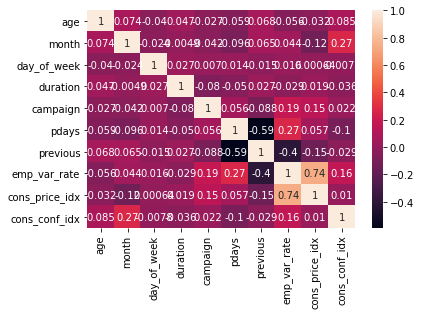

In [8]:
label_encode(dataset)

## Importing Models

In [9]:
import joblib

In [10]:
lc_model = joblib.load('Linear Model for Bank Telemarketing.pkl')
nb_model = joblib.load('Naive Bayes Model for Bank Telemarketing.pkl')
knn_model = joblib.load('KNN Model for Bank Telemarketing.pkl')
dtc_model = joblib.load('DTC Model for Bank Telemarketing.pkl')
rbf_svm_model = joblib.load('RBF SVM Model for Bank Telemarketing.pkl')

In [11]:
lc_predict = lc_model.predict(dataset)
print(lc_predict)

[0 0 0 ... 0 0 0]


In [12]:
nb_predict = nb_model.predict(dataset)
print(nb_predict)

[0 0 0 ... 0 0 0]


In [13]:
knn_predict = knn_model.predict(dataset)
print(knn_predict)

[0 0 0 ... 0 0 0]


In [14]:
dtc_predict = dtc_model.predict(dataset)
print(dtc_predict)

[0 0 0 ... 0 0 0]


In [15]:
rbf_svm_predict = rbf_svm_model.predict(dataset)
print(rbf_svm_predict)

[0 0 0 ... 0 0 0]


## Adding predictions to .csv

In [16]:
dataset['Linear Classification'] = lc_predict
dataset['Naive Bayes'] = nb_predict
dataset['KNN'] = knn_predict
dataset['Decision tree'] = dtc_predict
dataset['RBF SVM'] = rbf_svm_predict

In [17]:
dataset.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,Linear Classification,Naive Bayes,KNN,Decision tree,RBF SVM
0,30,1,1,2,0,1,0,5,5,487,...,0,1,-1.8,92.893,-46.2,0,0,0,0,0
1,39,7,2,3,0,0,0,5,5,346,...,0,1,1.1,93.994,-36.4,0,0,0,0,0
2,25,7,1,3,0,1,0,6,3,227,...,0,1,1.4,94.465,-41.8,0,0,0,0,0
4,47,0,1,6,0,1,0,11,1,58,...,0,1,-0.1,93.200,-42.0,0,0,0,0,0
5,32,7,2,6,0,0,0,9,4,128,...,2,0,-1.1,94.199,-37.5,0,1,0,0,0


In [18]:
label_encode(dataset,'decode')

In [19]:
dataset.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,Linear Classification,Naive Bayes,KNN,Decision tree,RBF SVM
0,30,blue-collar,married,basic.9y,no,yes,no,5,5,487,...,0,nonexistent,-1.8,92.893,-46.2,0,0,0,0,0
1,39,services,single,high.school,no,no,no,5,5,346,...,0,nonexistent,1.1,93.994,-36.4,0,0,0,0,0
2,25,services,married,high.school,no,yes,no,6,3,227,...,0,nonexistent,1.4,94.465,-41.8,0,0,0,0,0
4,47,admin.,married,university.degree,no,yes,no,11,1,58,...,0,nonexistent,-0.1,93.200,-42.0,0,0,0,0,0
5,32,services,single,university.degree,no,no,no,9,4,128,...,2,failure,-1.1,94.199,-37.5,0,1,0,0,0


In [20]:
dataset.to_csv('banking-batch_prediction.csv', index=False)